## how often to genes in clusters share funciton?

inspired by https://www.nature.com/articles/s41467-021-25129-x, "The molecular basis, genetic control and pleiotropic effects of local gene co-expression", espeically figure 3 and go term enrishment analysis and https://www.nature.com/articles/s42003-022-03831-w "Shared regulation and functional relevance of local gene co-expression revealed by single cell analysis" go term enrichment analysis

* distance in groups vs not
* paralog frequency
* bidirecitonal promotors?
* shared enhancers
* shared go term
* same pathway
* same complex 
* inverted/total ctcf motifs between
* hi-c contacts

I want to make some plots here, and also add all of these annotations to the cluster file. At a later point, perhaps automate the annotation of the clusters file with this information

In [50]:
import numpy as np
import pandas as pd
from tqdm.auto import tqdm  # for notebooks
tqdm.pandas()

import seaborn as sns
import matplotlib.pyplot as plt


# get outputs from a config file
prefix = '/home/klawren/oak/pcqtls'
import yaml
config_path= f'{prefix}/config/pcqtl_proteincoding.yaml'
with open(config_path, 'r') as f:
    config = yaml.safe_load(f)

tissue_id_path = config['tissue_id_path']
clusters_dir = config['clusters_dir']
expression_dir = config['expression_dir']

# load in the tissue ids 
tissue_df = pd.read_csv(f"{prefix}/{tissue_id_path}", header=0)
tissue_ids = list(tissue_df['Tissue'])
tissue_id = 'Lung'

protien_coding_only = True

## Cluster distances
pairs on genes in clusters vs random pairs
and for larger groups vs other random larger groups

In [2]:
# load in cluster data
cluster_df = pd.read_csv(f'{prefix}/{clusters_dir}/{tissue_id}_clusters_all_chr.csv', index_col=0)

In [3]:
# load in expression data (so we only compare to pairs of genes also expressed in this tissue)
# load in gene expression data
expression_df = pd.read_csv(f'{prefix}/{expression_dir}/{tissue_id}.v8.normalized_expression.bed', sep='\t')
expression_df

,#chr,start,end,gene_id,GTEX-111CU,GTEX-111FC,GTEX-111VG,GTEX-111YS,GTEX-1122O,GTEX-1128S,...,GTEX-ZVZQ,GTEX-ZXG5,GTEX-ZY6K,GTEX-ZYFG,GTEX-ZYT6,GTEX-ZYVF,GTEX-ZYW4,GTEX-ZYY3,GTEX-ZZPT,GTEX-ZZPU
0,chr1,29552,29553,ENSG00000227232.5,-1.449182,0.736806,-0.316085,-1.813418,-1.310808,-0.161000,...,0.717820,0.362398,0.769055,-0.019432,-0.092430,0.724120,-1.788822,0.300801,-0.326315,-0.929339
1,chr1,131024,131025,ENSG00000233750.3,1.522408,-0.388462,-1.699913,0.815600,1.449182,0.836096,...,-0.749612,-1.587484,2.109706,-1.554123,-0.936847,0.245329,-1.408731,-0.484675,-1.091180,1.622711
2,chr1,135894,135895,ENSG00000268903.1,0.310982,-0.072932,-0.235329,0.225352,0.815600,1.699913,...,-0.815600,-2.420390,0.967422,-1.956659,-1.145655,0.457535,-0.506646,0.414791,-0.136441,0.724120
3,chr1,137964,137965,ENSG00000269981.1,0.711549,-0.736806,-0.724120,0.452147,1.370462,1.990720,...,-0.699089,-2.269206,1.622711,-0.843007,-1.699913,-0.087552,-1.056592,-0.235329,-0.849957,0.620568
4,chr1,140338,140339,ENSG00000239906.1,0.180718,-1.234399,0.230338,0.038872,0.473777,1.813418,...,-0.501131,-1.234399,1.421957,-0.579850,-0.014574,0.285588,-1.234399,1.277147,0.019432,0.210428
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26090,chrX,155669943,155669944,ENSG00000185973.10,-0.952023,-0.151166,-0.802125,-0.551348,-0.795442,0.871061,...,0.215398,1.266242,-0.914479,-0.452147,0.479219,0.620568,0.802125,0.000000,0.936847,-0.769055
26091,chrX,155767811,155767812,ENSG00000168939.11,-0.146254,0.479219,-0.043734,0.316085,-0.452147,-0.523286,...,-0.863984,0.473777,0.014574,-0.921884,0.574113,-0.591383,0.736806,-1.244873,1.056592,0.305888
26092,chrX,155881292,155881293,ENSG00000124333.15,1.213847,0.072932,-0.967422,1.894644,0.245329,-0.270440,...,-0.501131,0.352043,-0.250339,0.097309,0.053461,-0.795442,1.065120,0.235329,-1.048141,0.808844
26093,chrX,155997580,155997581,ENSG00000124334.17,0.808844,0.004858,0.736806,-0.557012,-1.203760,1.039764,...,2.066729,-1.477525,-0.053461,0.545701,0.788794,-0.146254,0.769055,0.490145,-0.585607,-0.180718


In [83]:
# load in gene data
full_gencode=pd.read_csv('/home/klawren/oak/pcqtls/data/references/processed_gencode.v26.GRCh38.genes.gtf', sep='\t', skiprows=range(6), 
            header=None, names=['chr', 'dataset', 'type', 'start','end', '.', 'strand', 'na', 'info'])

full_gencode = full_gencode[full_gencode['type']=='transcript']
full_gencode['transcript_id'] = full_gencode['info'].str.split(';').str[1].str.split('\"').str[-2]
full_gencode['gene_type'] = full_gencode['info'].str.split(';').str[2].str.split('\"').str[-2]


# add in the start and end info
full_gencode['tss_start'] = np.where(full_gencode['strand'] == '+', full_gencode['start'], full_gencode['end'])
full_gencode['gene_end'] = np.where(full_gencode['strand'] == '-', full_gencode['start'], full_gencode['end'])

# filter to protien coding
if protien_coding_only:
    full_gencode = full_gencode[full_gencode['gene_type'] == 'protein_coding']

gid_gencode = full_gencode.set_index('transcript_id').drop_duplicates()

# subset to ones expressed
expressed_gencode = full_gencode[full_gencode['transcript_id'].isin(expression_df['gene_id'])]

# index based on gene id
expressed_gencode = expressed_gencode.set_index('transcript_id').drop_duplicates().sort_values(['chr', 'start', 'end'])

In [82]:
# add cluster size from gene-gene into cluster df
def get_cluster_size(row):
    transcript_ids = row['Transcripts'].split(',')
    cluster_gencode = gid_gencode.loc[transcript_ids]
    return  cluster_gencode['end'].max() - cluster_gencode['start'].min()

cluster_df['cluster_size'] = cluster_df.progress_apply(get_cluster_size, axis=1)

  0%|          | 0/1085 [00:00<?, ?it/s]

In [84]:
# a list of restricted cluster starts
# first for n=2, first and second for n=3, ...
cluster_start_ids = []
for i in range(cluster_df['N_genes'].max()):
    out_ids = cluster_df[cluster_df['N_genes'] == i]['Transcripts'].str.split(',').str[:i-1].values
    if len(out_ids)>0:
        cluster_start_ids.append(np.concatenate(out_ids))
    else:
        cluster_start_ids.append([])


In [85]:
def get_null_cluster_sizes(gencode_df, num_genes, cluster_start_ids):
    # sort
    gencode_df = gencode_df.sort_values(['chr', 'start', 'end'])
    # on a per chorm basis
    size_output = []
    for chr_id in range (1,23,1):
        chr_subset_gencode = gencode_df[gencode_df['chr'] == f'chr{chr_id}']
        chr_sizes = chr_subset_gencode['end'].shift(-(num_genes-1)) - chr_subset_gencode['start']
        chr_sizes = chr_sizes.iloc[:-(num_genes-1)]
        # select only those not in this cluster
        chr_sizes = chr_sizes[~pd.Series(chr_sizes.index.values).isin(cluster_start_ids[num_genes:]).values]
        size_output.append(chr_sizes.values)
    return np.concatenate(size_output)

In [86]:
# get background distances for clusters
# should only include clusters that aren't pairs
# can do this be removing the first transcript from the output
pair_background = get_null_cluster_sizes(expressed_gencode, 2, cluster_start_ids)
three_background = get_null_cluster_sizes(expressed_gencode, 3, cluster_start_ids)
four_background = get_null_cluster_sizes(expressed_gencode, 4, cluster_start_ids)

# combine into one df
null_df = pd.DataFrame({'data_type':np.concatenate([['2_null']*len(pair_background), 
                                                    ['3_null']*len(three_background), 
                                                    ['4_null']*len(four_background)]), 
               'cluster_size': np.concatenate([pair_background, 
                                               three_background, 
                                               four_background])})

# add a label column to the cluster df 
cluster_df['data_type'] = cluster_df['N_genes'].clip(0,4).astype(str) + '_cluster'

/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)
/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)
/home/klawren/micromamba/envs/tensorqtl_r/lib/python3.8/site-packages/pandas/core/algorithms.py:531: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  return f(comps_array, values)


/local/scratch/klawren/slrmtmp.42917157/ipykernel_4572/945775713.py:3: UserWarning: The palette list has more values (12) than needed (6), which may not be intended.
  sns.kdeplot(pd.concat([cluster_df, null_df]), x='cluster_size', hue='data_type', clip=(0, 10**6),


Text(0.5, 1.0, 'Distribution of gene-gene distance for clusters and genomic background')

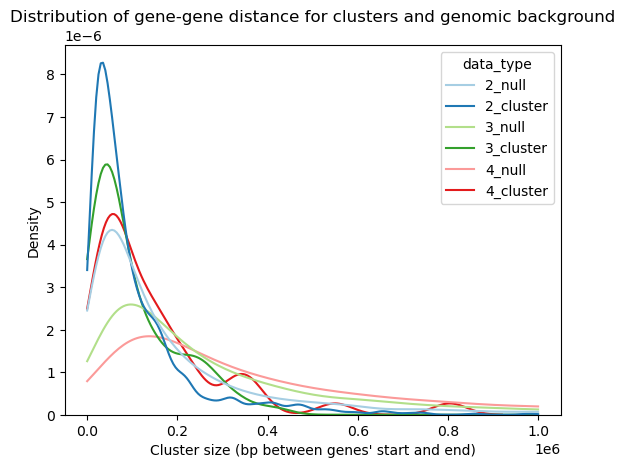

In [90]:
fig, ax = plt.subplots()

sns.kdeplot(pd.concat([cluster_df, null_df]), x='cluster_size', hue='data_type', clip=(0, 10**6), 
            bw_adjust=.5, fill=False, ax=ax, common_norm=False, palette = sns.color_palette("Paired"), 
            hue_order=['2_null','2_cluster','3_null','3_cluster','4_null', '4_cluster'])
plt.xlabel("Cluster size (bp between genes' start and end)")
plt.title('Distribution of gene-gene distance for clusters and genomic background')

## bidirectional promotors
if any of the genes in the cluster are opposite strand with tss < 1000 bp away, classify as bidirecitonal promotor